In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

plt.style.use("ggplot")
pd.set_option('display.max_columns', None) # Para não limitar as colunas que serão mostradas no dataframe

# Análise exploratória dos dados


### Entendendo o dataset

In [2]:
df = pd.read_csv("data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
df.shape

(8124, 23)

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

O dataset já está limpo e não possui valores nulos. 

A fim de que seja melhor de entender os atributos do cogumelos, renomeamos eles de acordo com os seus significados disponíveis na descrição do dataset no Kaggle.

In [6]:
attribute_mapping = {
    'class': {'e': 'edible', 'p': 'poisonous'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'yes', 'f': 'no'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

df.replace(attribute_mapping, inplace=True)

![image](https://www.researchgate.net/profile/Eduardo-Goncalves-9/publication/237635634/figure/fig2/AS:356573340815361@1462025117560/Figura-43-Cogumelo-com-lamelas.png)

### Visualização de atributos

C:\Users\Amaury\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


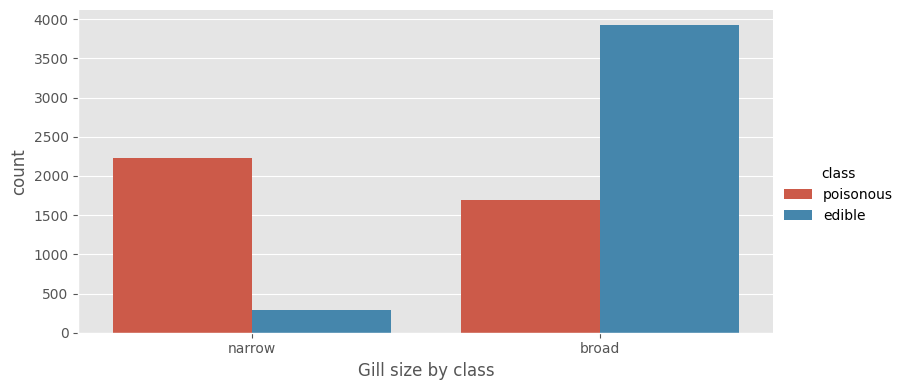

In [7]:
p = sns.catplot(data=df, x="gill-size", kind="count", hue="class", height=4, aspect=2)
p.set_axis_labels("Gill size by class");

C:\Users\Amaury\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


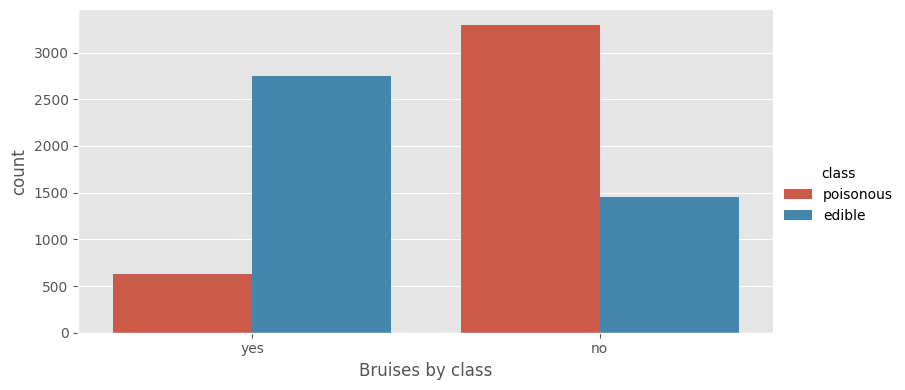

In [8]:
p = sns.catplot(data=df, x="bruises", kind="count", hue="class", height=4, aspect=2)
p.set_axis_labels("Bruises by class");

C:\Users\Amaury\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


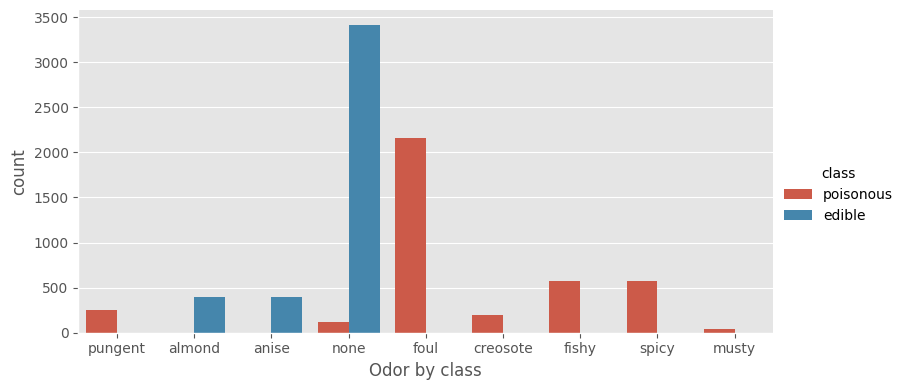

In [9]:
p = sns.catplot(data=df, x="odor", kind="count", hue="class", height=4, aspect=2)
p.set_axis_labels("Odor by class");

### Pré-processamento dos dados

In [10]:
X = df.copy()
y = X.pop("class")

Processa as features ordinais preservando suas ordens.

In [11]:
ordinal_features = ["gill-spacing", "gill-size", "ring-number"]
X.loc[:, ordinal_features].head()

,gill-spacing,gill-size,ring-number
0,close,narrow,one
1,close,broad,one
2,close,broad,one
3,close,narrow,one
4,crowded,broad,one


In [12]:
ordinal_enc = OrdinalEncoder()
ordinal_enc.fit(X[ordinal_features])
X[ordinal_features] = ordinal_enc.transform(X[ordinal_features])
X[ordinal_features].head()

,gill-spacing,gill-size,ring-number
0,0.0,1.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,1.0,1.0
4,1.0,0.0,1.0


In [13]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,yes,pungent,free,0.0,1.0,black,enlarging,equal,smooth,smooth,white,white,partial,white,1.0,pendant,black,scattered,urban
1,convex,smooth,yellow,yes,almond,free,0.0,0.0,black,enlarging,club,smooth,smooth,white,white,partial,white,1.0,pendant,brown,numerous,grasses
2,bell,smooth,white,yes,anise,free,0.0,0.0,brown,enlarging,club,smooth,smooth,white,white,partial,white,1.0,pendant,brown,numerous,meadows
3,convex,scaly,white,yes,pungent,free,0.0,1.0,brown,enlarging,equal,smooth,smooth,white,white,partial,white,1.0,pendant,black,scattered,urban
4,convex,smooth,gray,no,none,free,1.0,0.0,black,tapering,equal,smooth,smooth,white,white,partial,white,1.0,evanescent,brown,abundant,grasses


Processa as features nominais utilizando o método de one-hot-encoding.

In [14]:
nominal_features = [column for column in X.columns if column not in ordinal_features]
nominal_features

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [15]:
pd.Categorical(X[nominal_features])
X = pd.get_dummies(X, drop_first=True)
X.head()

,gill-spacing,gill-size,ring-number,cap-shape_conical,cap-shape_convex,cap-shape_flat,cap-shape_knobbed,cap-shape_sunken,cap-surface_grooves,cap-surface_scaly,cap-surface_smooth,cap-color_buff,cap-color_cinnamon,cap-color_gray,cap-color_green,cap-color_pink,cap-color_purple,cap-color_red,cap-color_white,cap-color_yellow,bruises_yes,odor_anise,odor_creosote,odor_fishy,odor_foul,odor_musty,odor_none,odor_pungent,odor_spicy,gill-attachment_free,gill-color_brown,gill-color_buff,gill-color_chocolate,gill-color_gray,gill-color_green,gill-color_orange,gill-color_pink,gill-color_purple,gill-color_red,gill-color_white,gill-color_yellow,stalk-shape_tapering,stalk-root_club,stalk-root_equal,stalk-root_missing,stalk-root_rooted,stalk-surface-above-ring_scaly,stalk-surface-above-ring_silky,stalk-surface-above-ring_smooth,stalk-surface-below-ring_scaly,stalk-surface-below-ring_silky,stalk-surface-below-ring_smooth,stalk-color-above-ring_buff,stalk-color-above-ring_cinnamon,stalk-color-above-ring_gray,stalk-color-above-ring_orange,stalk-color-above-ring_pink,stalk-color-above-ring_red,stalk-color-above-ring_white,stalk-color-above-ring_yellow,stalk-color-below-ring_buff,stalk-color-below-ring_cinnamon,stalk-color-below-ring_gray,stalk-color-below-ring_orange,stalk-color-below-ring_pink,stalk-color-below-ring_red,stalk-color-below-ring_white,stalk-color-below-ring_yellow,veil-color_orange,veil-color_white,veil-color_yellow,ring-type_flaring,ring-type_large,ring-type_none,ring-type_pendant,spore-print-color_brown,spore-print-color_buff,spore-print-color_chocolate,spore-print-color_green,spore-print-color_orange,spore-print-color_purple,spore-print-color_white,spore-print-color_yellow,population_clustered,population_numerous,population_scattered,population_several,population_solitary,habitat_leaves,habitat_meadows,habitat_paths,habitat_urban,habitat_waste,habitat_woods
0,0.0,1.0,1.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
1,0.0,0.0,1.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,0.0,0.0,1.0,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False
3,0.0,1.0,1.0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,

In [16]:
X.shape

(8124, 94)

Agora possuímos 94 features - 72 features a mais em relação a quantidade original.

Convertemos a classe para um vetor binário.

In [17]:
label_enc = LabelEncoder()
label_enc.fit(y)
y = label_enc.transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

### Seleção de atributos
Analisamos os valores de cada atributo utilizando a métrica chi2

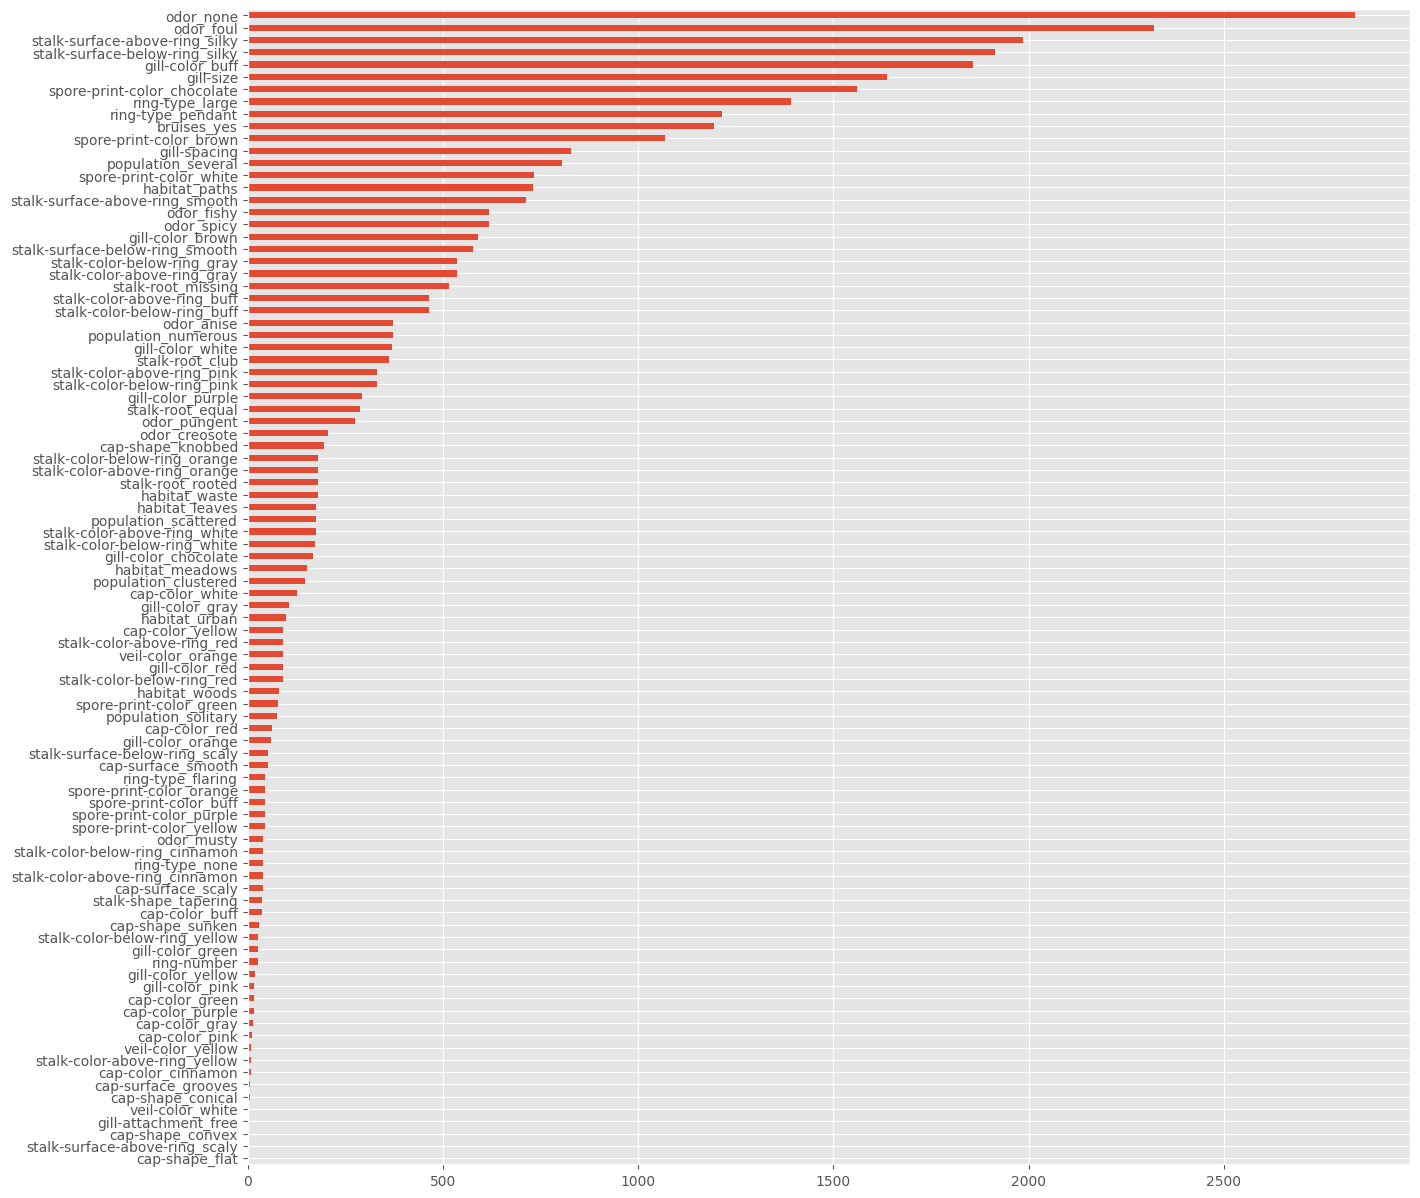

In [18]:
# Para features categóricas, as duas métricas mais comuns são o chi2 e a mutual information
chi2_features, p_values_features = chi2(X, y)
chi2_features = pd.Series(chi2_features, index = X.columns, name = 'chi2')
chi2_features.sort_values(ascending = True).plot(kind = 'barh', figsize = (15, 15));

In [19]:
chi2_features.describe()

count      94.000000
mean      371.740721
std       565.693728
min         1.706428
25%        38.684372
50%       137.037727
75%       464.212462
max      2836.187954
Name: chi2, dtype: float64

Filtramos o top 30% das features com base em seu chi2 score

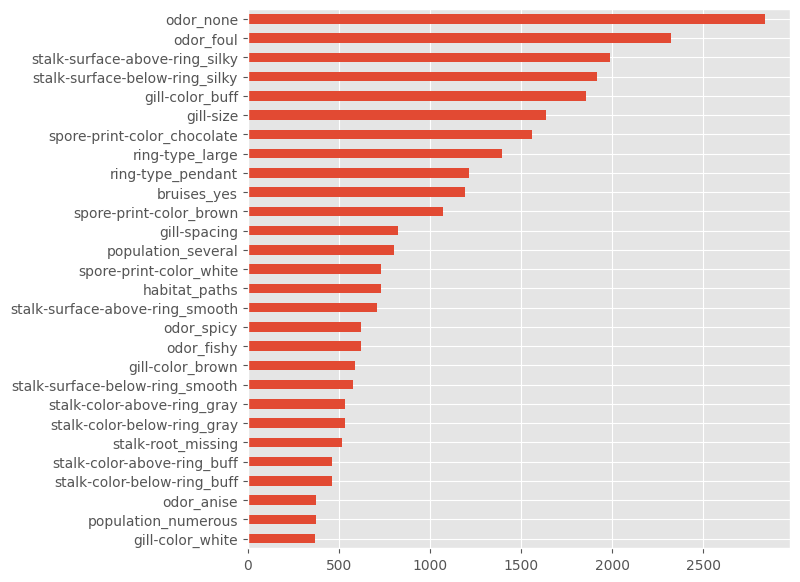

In [20]:
# Seleciona todas features que estão no top 30%
chi_top_30_features = chi2_features.where(lambda chi: chi > chi2_features.quantile(0.7)).dropna() 
chi_top_30_features.sort_values(ascending = True).plot(kind = 'barh', figsize = (7, 7));

In [21]:
k = len(chi_top_30_features)

Utilizaremos o *SelectKBest* do sklearn para filtar os melhores atributos do modelo com base no valor de k inferido. 

In [22]:
k_best = SelectKBest(chi2, k=k)
k_best.fit(X, y)
# Para demonstração que as features selecionadas são as mesmas que as inferidas
k_best.get_feature_names_out() == chi_top_30_features.index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [23]:
X_new = k_best.transform(X)

Usamos K-Fold Cross Validation para gerar as métricas para cada modelo. Fixamos k = 10 para todos os modelos, por ser o valor mais comum para cross validation e utilizamos os hiperparâmetros padrão para todos os algoritmos.

In [24]:
from utils.k_fold_cross_validation import KFoldCrossValidation
crossValidationK = 10

<h1>Florestas Aleatórias</h1>


In [25]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
forestCrossValidationMetrics = KFoldCrossValidation(X_new,y,crossValidationK,random_forest, ['edible', 'poisonous'])

Começamos mostrando a matriz de confusão do modelo. Esta matriz de confusão é calculada somando as matrizes de confusão de cada um dos k modelos gerados durante a K Fold Cross Validation. A lógica para isso é que cada uma das matrizes de confusão representa a performance do modelo para a k-ésima parte do conjunto de dados. Somando todas, temos a performance do modelo para todo o conjunto de dados.

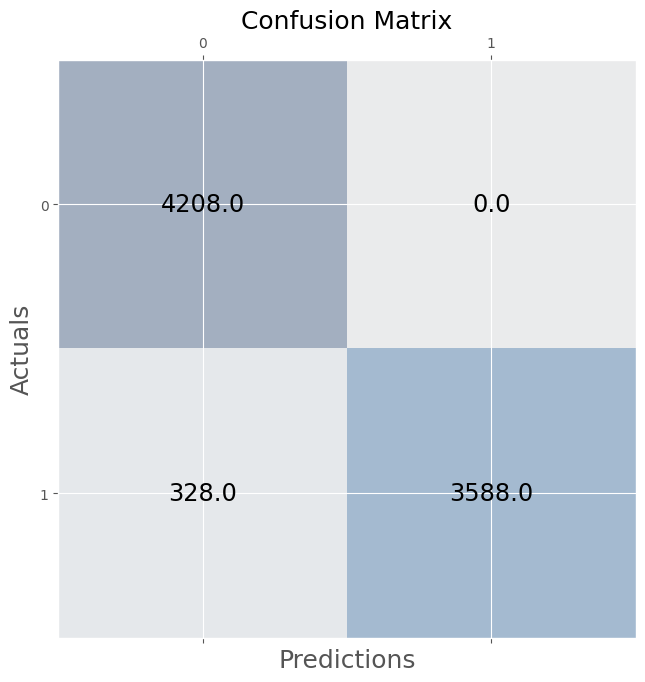

In [26]:
forestCrossValidationMetrics.show_summed_matrix()

Então, plotamos as métricas de todas as instâncias do modelo geradas durante o K Fold Cross Validation, com a linha preta horizontal indicando a média dos valores.

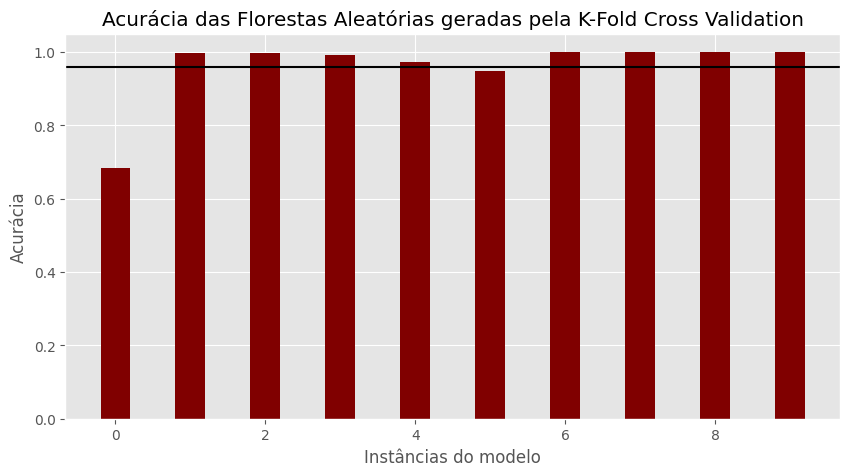

In [28]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), forestCrossValidationMetrics.accuracies, color ='maroon', width = 0.4)
plt.axhline(y=forestCrossValidationMetrics.avgAccuracy, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("Acurácia")
plt.title("Acurácia das Florestas Aleatórias geradas pela K-Fold Cross Validation")
plt.show()

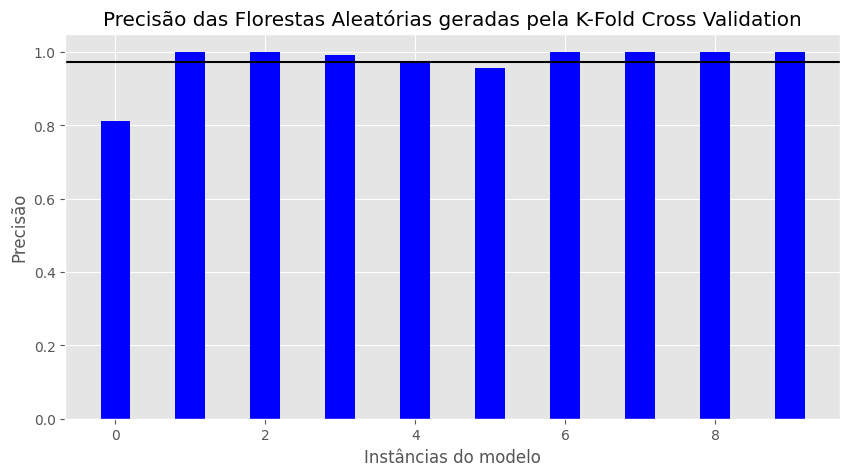

In [29]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), forestCrossValidationMetrics.precisions, color ='blue', width = 0.4)
plt.axhline(y=forestCrossValidationMetrics.avgPrecision, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("Precisão")
plt.title("Precisão das Florestas Aleatórias geradas pela K-Fold Cross Validation")
plt.show()

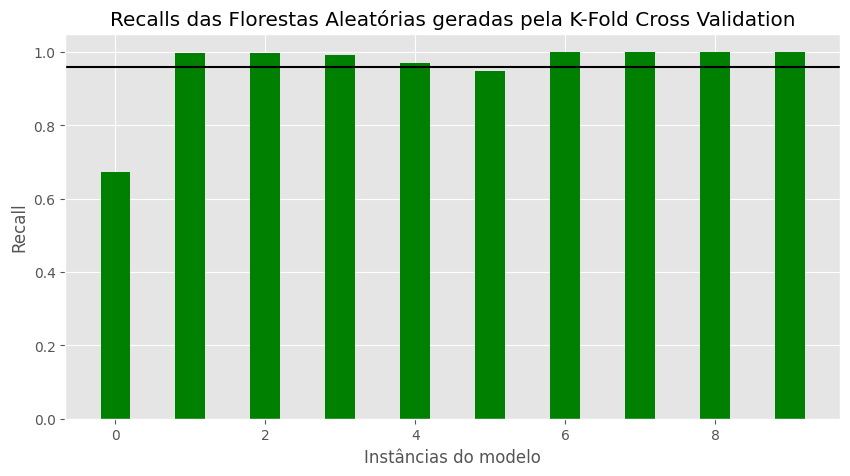

In [30]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), forestCrossValidationMetrics.recalls, color ='green', width = 0.4)
plt.axhline(y=forestCrossValidationMetrics.avgRecall, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("Recall")
plt.title("Recalls das Florestas Aleatórias geradas pela K-Fold Cross Validation")
plt.show()

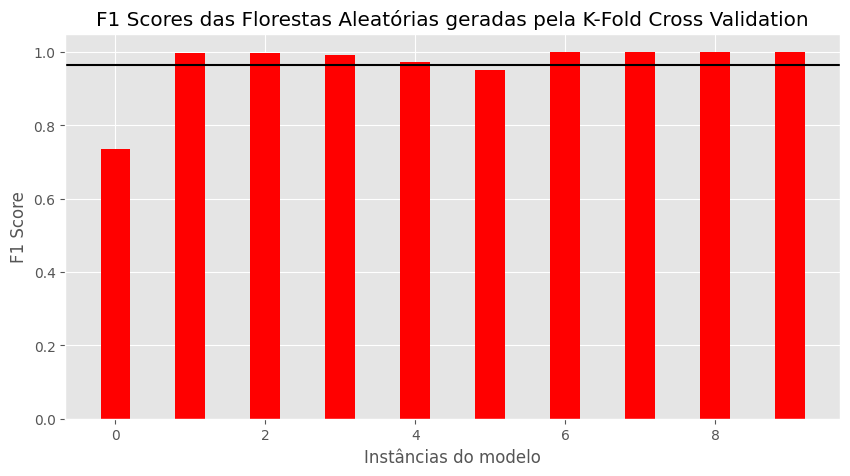

In [31]:
fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), forestCrossValidationMetrics.f1_scores, color ='red', width = 0.4)
 
plt.xlabel("Instâncias do modelo")
plt.ylabel("F1 Score")
plt.title("F1 Scores das Florestas Aleatórias geradas pela K-Fold Cross Validation")
plt.axhline(y=forestCrossValidationMetrics.avgF1, color='black')
plt.show()

Por fim, plotamos as médias e desvios padrão das métricas previamente apresentadas

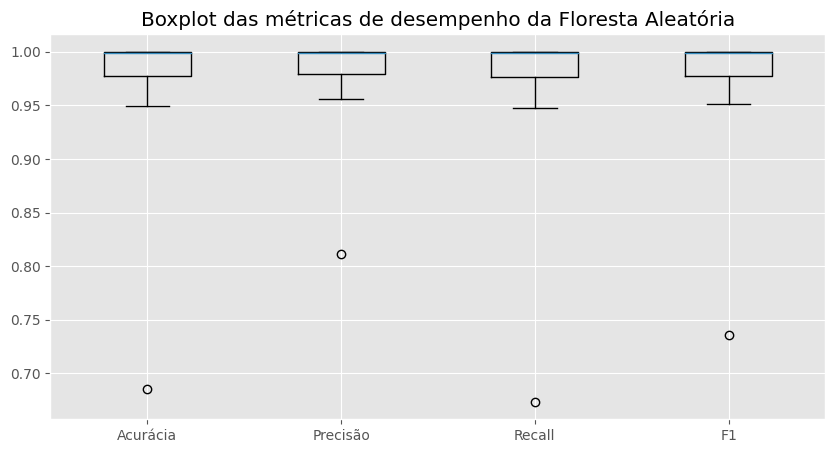

		Média		Desvio padrão
Acurácia	0.960		0.093
Precisão	0.973		0.056
Recall		0.958		0.096
F1		0.965		0.078


In [41]:
fig = plt.figure(figsize = (10, 5))
randomForestMetrics = [forestCrossValidationMetrics.accuracies, forestCrossValidationMetrics.precisions, forestCrossValidationMetrics.recalls, forestCrossValidationMetrics.f1_scores]
plt.title("Boxplot das métricas de desempenho da Floresta Aleatória")
plt.boxplot(x=randomForestMetrics, labels=["Acurácia", "Precisão", "Recall", "F1"])
plt.show()

print("\t\tMédia\t\tDesvio padrão")
print(f"Acurácia\t{forestCrossValidationMetrics.avgAccuracy:.3f}\t\t{forestCrossValidationMetrics.stdAccuracy:.3f}")
print(f"Precisão\t{forestCrossValidationMetrics.avgPrecision:.3f}\t\t{forestCrossValidationMetrics.stdPrecision:.3f}")
print(f"Recall\t\t{forestCrossValidationMetrics.avgRecall:.3f}\t\t{forestCrossValidationMetrics.stdRecall:.3f}")
print(f"F1\t\t{forestCrossValidationMetrics.avgF1:.3f}\t\t{forestCrossValidationMetrics.stdF1:.3f}")

<h1>Naïve Bayes</h1>


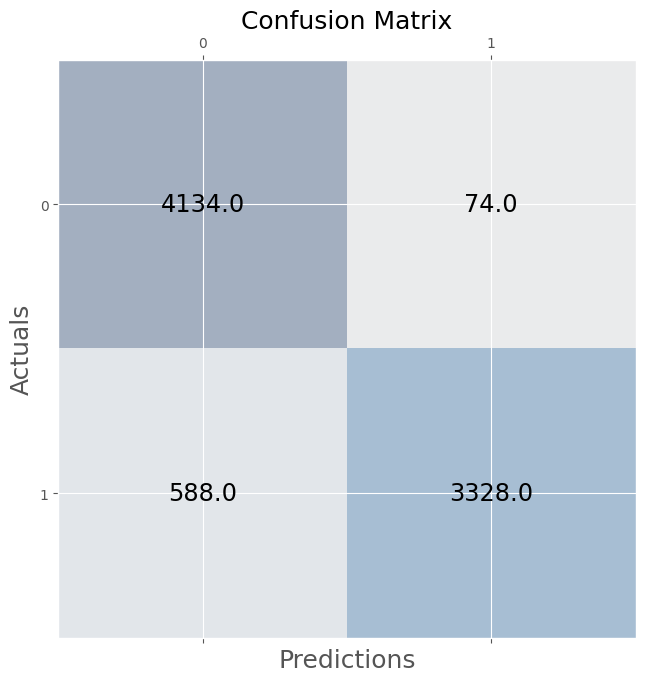

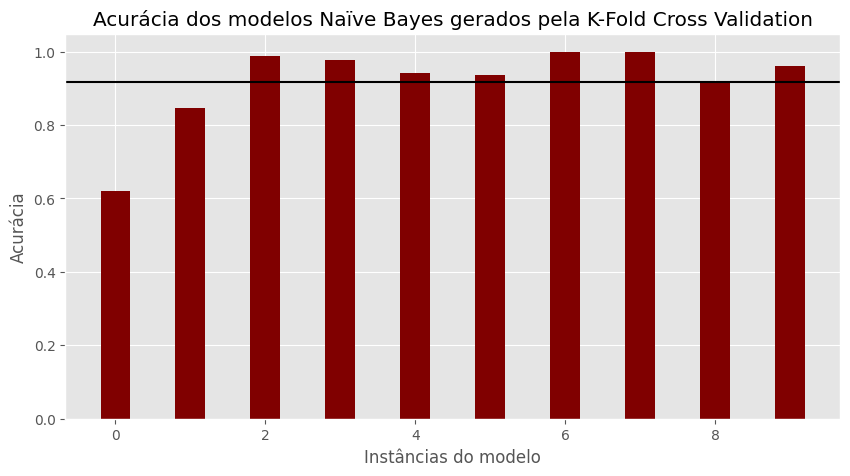

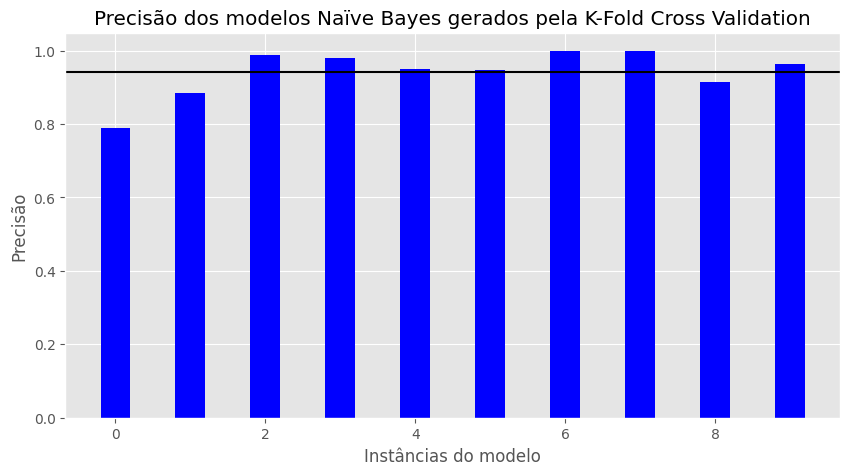

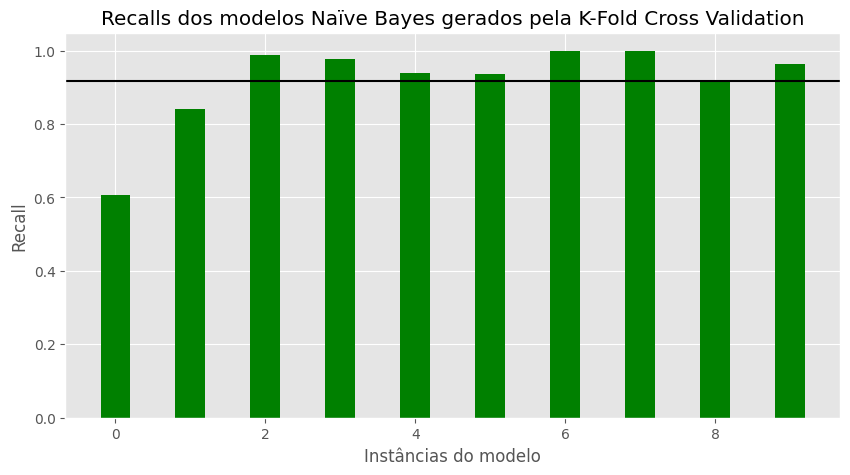

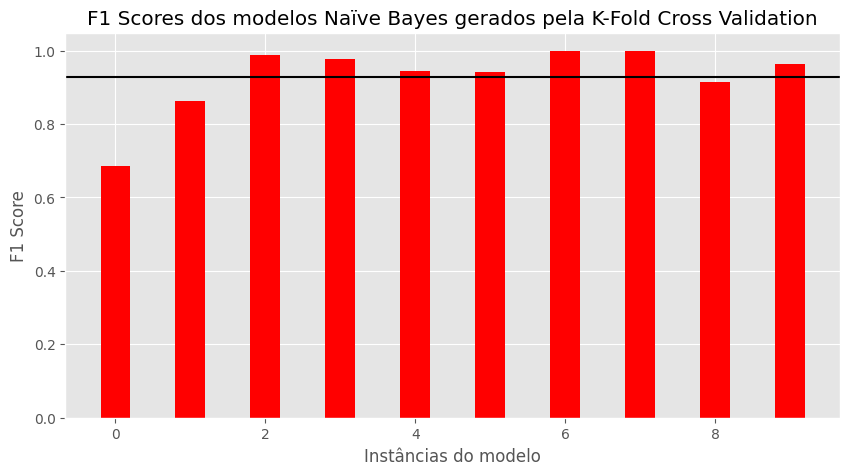

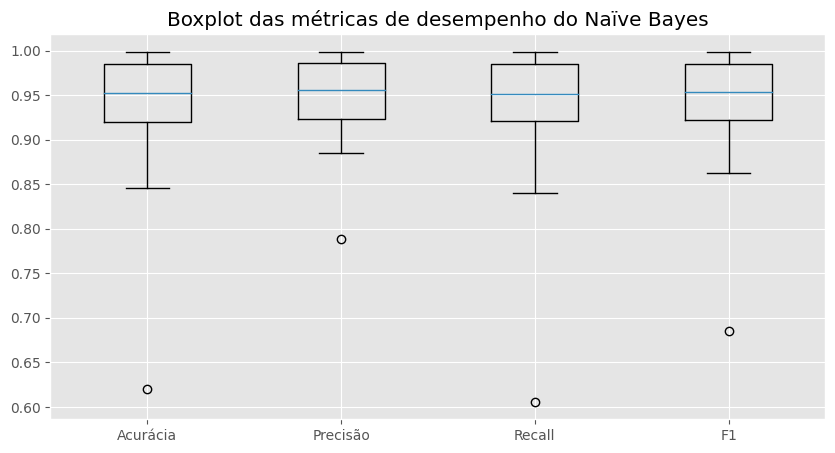

		Média		Desvio padrão
Acurácia	0.919		0.109
Precisão	0.941		0.062
Recall		0.916		0.113
F1		0.927		0.090


In [42]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
NBCrossValidationMetrics = KFoldCrossValidation(X_new,y,crossValidationK,naive_bayes, ['edible', 'poisonous'])

NBCrossValidationMetrics.show_summed_matrix()
fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), NBCrossValidationMetrics.accuracies, color ='maroon', width = 0.4)
plt.axhline(y=NBCrossValidationMetrics.avgAccuracy, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("Acurácia")
plt.title("Acurácia dos modelos Naïve Bayes gerados pela K-Fold Cross Validation")
plt.show()

fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), NBCrossValidationMetrics.precisions, color ='blue', width = 0.4)
plt.axhline(y=NBCrossValidationMetrics.avgPrecision, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("Precisão")
plt.title("Precisão dos modelos Naïve Bayes gerados pela K-Fold Cross Validation")
plt.show()

fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), NBCrossValidationMetrics.recalls, color ='green', width = 0.4)
plt.axhline(y=NBCrossValidationMetrics.avgRecall, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("Recall")
plt.title("Recalls dos modelos Naïve Bayes gerados pela K-Fold Cross Validation")
plt.show()

fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), NBCrossValidationMetrics.f1_scores, color ='red', width = 0.4)
plt.axhline(y=NBCrossValidationMetrics.avgF1, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("F1 Score")
plt.title("F1 Scores dos modelos Naïve Bayes gerados pela K-Fold Cross Validation")
plt.show()

fig = plt.figure(figsize = (10, 5))
NBMetrics = [NBCrossValidationMetrics.accuracies, NBCrossValidationMetrics.precisions, NBCrossValidationMetrics.recalls, NBCrossValidationMetrics.f1_scores]
plt.title("Boxplot das métricas de desempenho do Naïve Bayes")
plt.boxplot(x=NBMetrics, labels=["Acurácia", "Precisão", "Recall", "F1"])
plt.show()

print("\t\tMédia\t\tDesvio padrão")
print(f"Acurácia\t{NBCrossValidationMetrics.avgAccuracy:.3f}\t\t{NBCrossValidationMetrics.stdAccuracy:.3f}")
print(f"Precisão\t{NBCrossValidationMetrics.avgPrecision:.3f}\t\t{NBCrossValidationMetrics.stdPrecision:.3f}")
print(f"Recall\t\t{NBCrossValidationMetrics.avgRecall:.3f}\t\t{NBCrossValidationMetrics.stdRecall:.3f}")
print(f"F1\t\t{NBCrossValidationMetrics.avgF1:.3f}\t\t{NBCrossValidationMetrics.stdF1:.3f}")

<h1>Regressão Logística<h1>

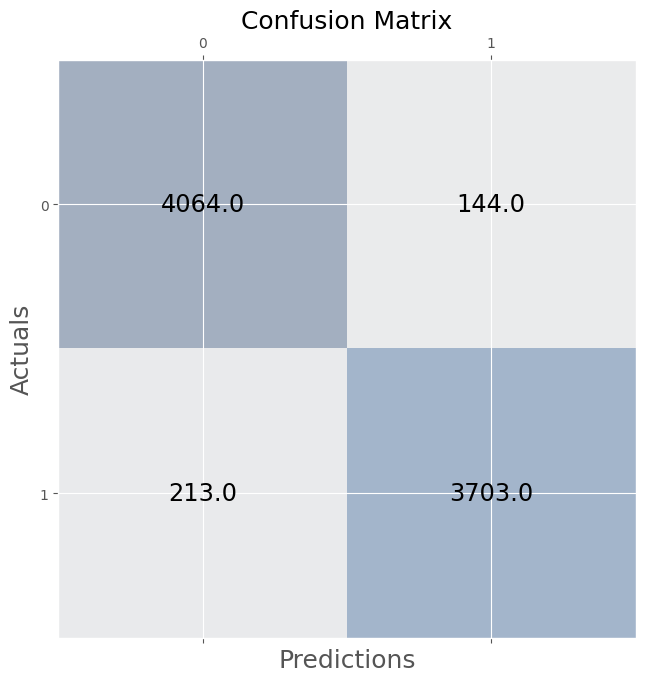

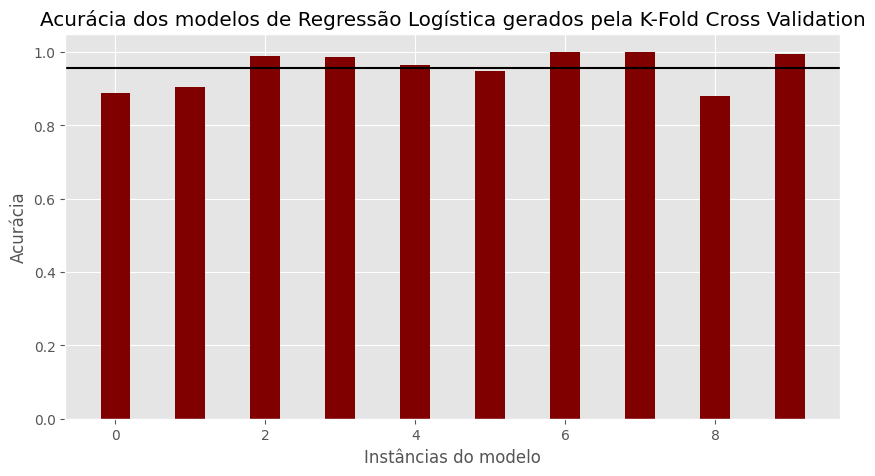

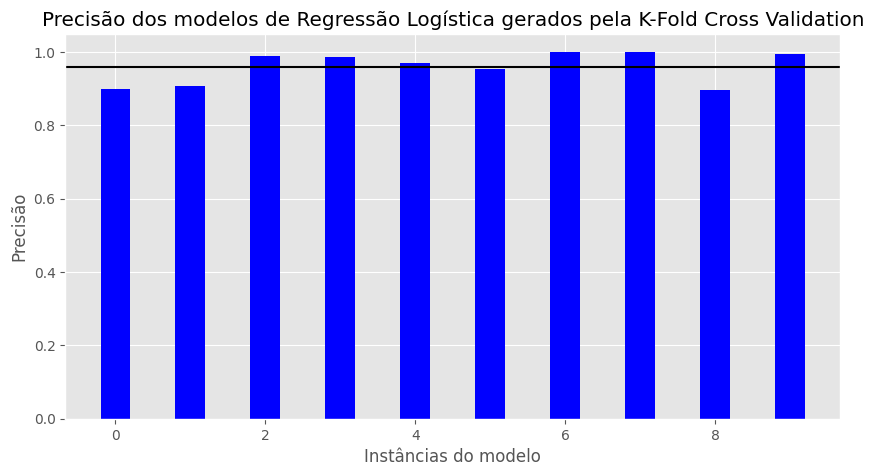

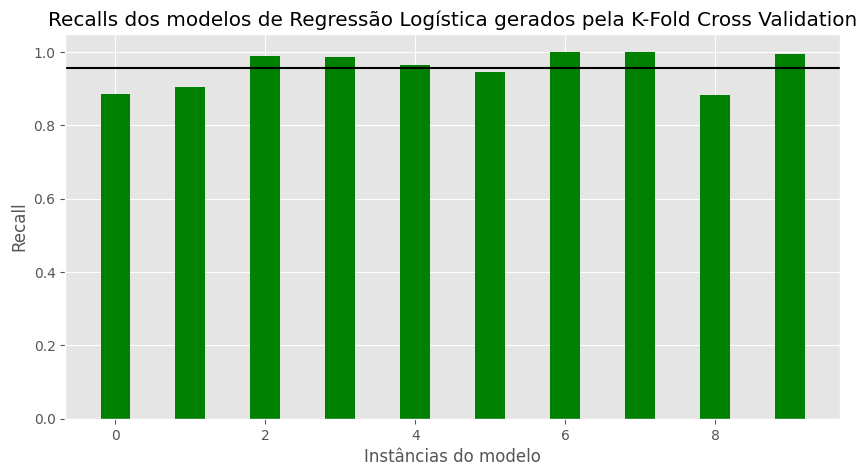

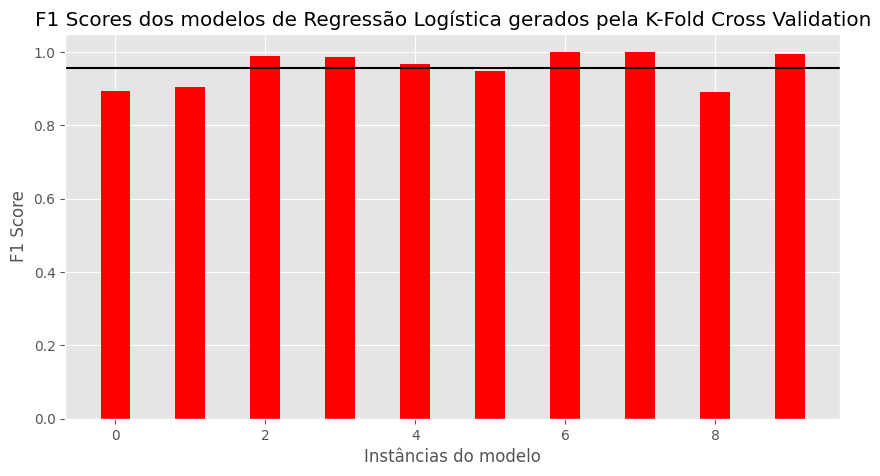

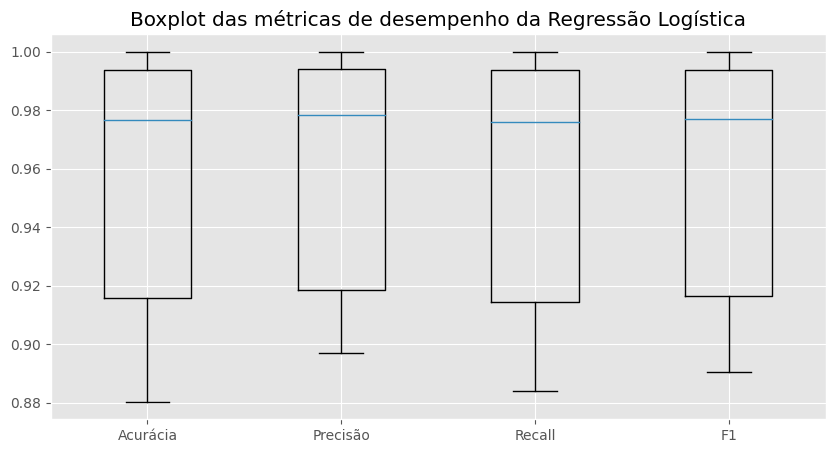

		Média		Desvio padrão
Acurácia	0.956		0.045
Precisão	0.960		0.041
Recall		0.956		0.045
F1		0.958		0.043


In [43]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

logRegCrossValidationMetrics = KFoldCrossValidation(X_new,y,crossValidationK,log_regression, ['edible', 'poisonous'])

logRegCrossValidationMetrics.show_summed_matrix()
fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), logRegCrossValidationMetrics.accuracies, color ='maroon', width = 0.4)
plt.axhline(y=logRegCrossValidationMetrics.avgAccuracy, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("Acurácia")
plt.title("Acurácia dos modelos de Regressão Logística gerados pela K-Fold Cross Validation")
plt.show()

fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), logRegCrossValidationMetrics.precisions, color ='blue', width = 0.4)
plt.axhline(y=logRegCrossValidationMetrics.avgPrecision, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("Precisão")
plt.title("Precisão dos modelos de Regressão Logística gerados pela K-Fold Cross Validation")
plt.show()

fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), logRegCrossValidationMetrics.recalls, color ='green', width = 0.4)
plt.axhline(y=logRegCrossValidationMetrics.avgRecall, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("Recall")
plt.title("Recalls dos modelos de Regressão Logística gerados pela K-Fold Cross Validation")
plt.show()

fig = plt.figure(figsize = (10, 5))
 
plt.bar(range(crossValidationK), logRegCrossValidationMetrics.f1_scores, color ='red', width = 0.4)
plt.axhline(y=logRegCrossValidationMetrics.avgF1, color='black')
plt.xlabel("Instâncias do modelo")
plt.ylabel("F1 Score")
plt.title("F1 Scores dos modelos de Regressão Logística gerados pela K-Fold Cross Validation")
plt.show()

fig = plt.figure(figsize = (10, 5))
NBMetrics = [logRegCrossValidationMetrics.accuracies, logRegCrossValidationMetrics.precisions, logRegCrossValidationMetrics.recalls, logRegCrossValidationMetrics.f1_scores]
plt.title("Boxplot das métricas de desempenho da Regressão Logística")
plt.boxplot(x=NBMetrics, labels=["Acurácia", "Precisão", "Recall", "F1"])
plt.show()

print("\t\tMédia\t\tDesvio padrão")
print(f"Acurácia\t{logRegCrossValidationMetrics.avgAccuracy:.3f}\t\t{logRegCrossValidationMetrics.stdAccuracy:.3f}")
print(f"Precisão\t{logRegCrossValidationMetrics.avgPrecision:.3f}\t\t{logRegCrossValidationMetrics.stdPrecision:.3f}")
print(f"Recall\t\t{logRegCrossValidationMetrics.avgRecall:.3f}\t\t{logRegCrossValidationMetrics.stdRecall:.3f}")
print(f"F1\t\t{logRegCrossValidationMetrics.avgF1:.3f}\t\t{logRegCrossValidationMetrics.stdF1:.3f}")